In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
house_df = pd.read_csv('housing.csv')
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
house_df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [4]:
house_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# filling the missing values in total_bedrooms with 0

house_df['total_bedrooms'] = house_df.total_bedrooms.fillna(0)

In [6]:
house_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Creating variables from the features in addition to the variables we have in the dataset 

- rooms_per_household
- bedrooms_per_room
- population_per_household

In [7]:
house_df['rooms_per_household'] = (house_df['total_rooms'] / house_df['households'])
house_df['bedrooms_per_room'] = (house_df['total_bedrooms'] / house_df['total_rooms'])
house_df['population_per_household'] = (house_df['population'] / house_df['households'])

In [8]:
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [9]:
house_df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


# Most frequent observation (mode) for ocean_proximity feature

In [10]:
# Most frequent observation (mode) for ocean_proximity feature

house_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Split the data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
house_full_df, X_test = train_test_split(house_df, test_size=0.2, random_state=42)


In [13]:
X_train, X_val = train_test_split(house_full_df, test_size=0.25, random_state=42)


In [14]:
X_train.shape, X_val.shape, X_test.shape

((12384, 13), (4128, 13), (4128, 13))

In [15]:
y_train = X_train.median_house_value.values
y_val = X_val.median_house_value.values
y_test = X_test.median_house_value.values

In [16]:
X_train.drop('median_house_value', axis=1, inplace=True)
X_val.drop('median_house_value', axis=1, inplace=True)
X_test.drop('median_house_value', axis=1, inplace=True)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [18]:
X_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2071,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
2612,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949
10838,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120
4061,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609
10767,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695


In [19]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,INLAND,4.192201,0.0,3.877437
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,INLAND,5.039384,0.0,2.679795
15663,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.0,1.360332
20484,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.0,3.444444
9814,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.0,2.483645


In [20]:
y_train.shape, y_val.shape, y_test.shape

((12384,), (4128,), (4128,))

In [21]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
16339,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
14965,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
11117,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [22]:
# resetting the indexes of the dataframes 

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Correlation Matrix

In [23]:
house_full_df = house_full_df.reset_index(drop=True)

In [24]:
house_full_df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [25]:
house_full_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [26]:
numerical_var = ['longitude', 'latitude', 'housing_median_age', 
                'total_rooms', 'total_bedrooms', 'population', 
                'households', 'median_income', 'rooms_per_household',
                'bedrooms_per_room', 'population_per_household']

In [27]:
house_full_df[numerical_var]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


In [28]:
# correlation coeffient 

house_full_df[numerical_var].corrwith(house_full_df.median_house_value)

longitude                  -0.046349
latitude                   -0.142983
housing_median_age          0.103706
total_rooms                 0.133989
total_bedrooms              0.047980
population                 -0.026032
households                  0.063714
median_income               0.690647
rooms_per_household         0.158485
bedrooms_per_room          -0.257419
population_per_household   -0.022030
dtype: float64

<AxesSubplot:>

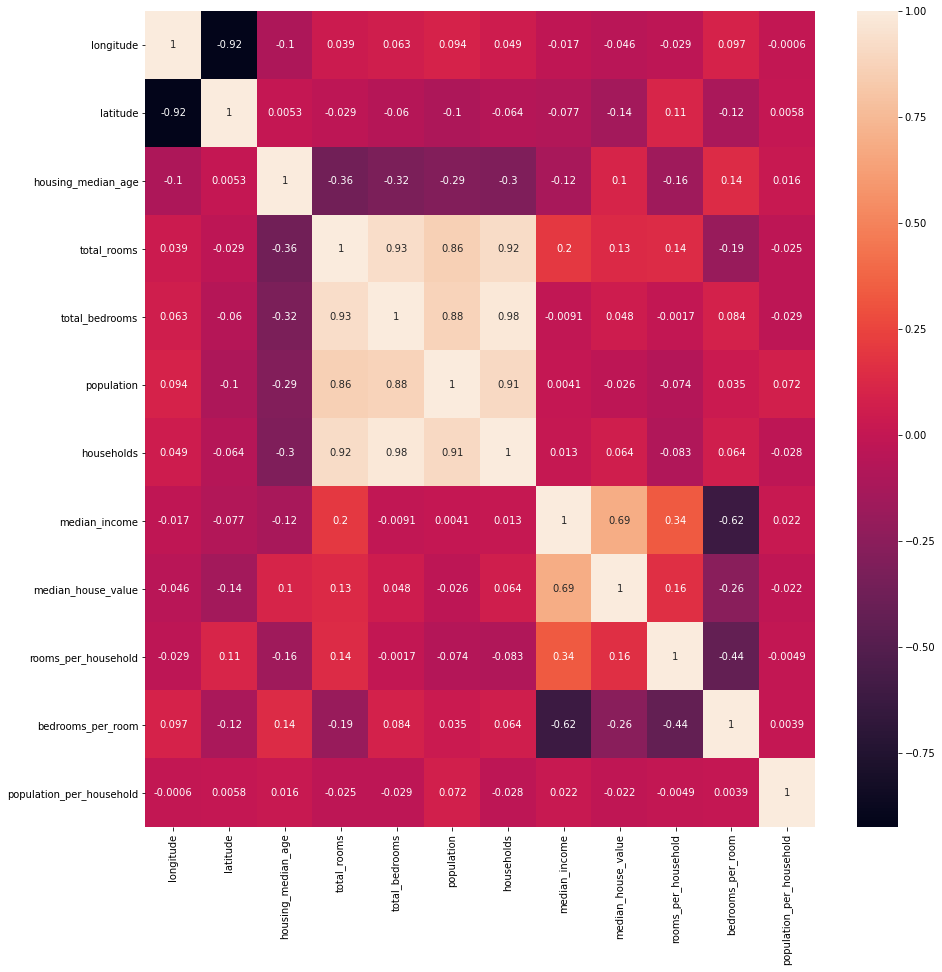

In [29]:
plt.figure(figsize=(15,15)) 
sns.heatmap(house_full_df.corr(), annot=True) 

# Make median_house_value binary

- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [30]:
# average median_house_value

avg_price = house_df.median_house_value.mean()
avg_price

206855.81690891474

In [31]:
# turning the target variable to binary 

y_train = np.where(y_train > avg_price, 1, 0)
y_val = np.where(y_val > avg_price, 1, 0)
y_test = np.where(y_test > avg_price, 1, 0)


In [32]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [33]:
# value counts of the target variable
# y_train
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7336]
 [   1 5048]]


In [34]:
# value counts of the target variable
# y_val
unique, counts = np.unique(y_val, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2443]
 [   1 1685]]


In [35]:
# value counts of the target variable
# y_test
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2476]
 [   1 1652]]


# Mutual Information Score 

In [36]:
# importing the mutual info score from sklearn 

from sklearn.metrics import mutual_info_score

In [37]:
mutual_info_score(y_train, X_train.ocean_proximity)

0.10138385763624205

# One Hot Encoding

- Transforming the dataset and train the logistics regression

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
categorical_var = ['ocean_proximity']

In [40]:
train_dicts = X_train[categorical_var + numerical_var].to_dict(orient='records')

In [41]:
dv = DictVectorizer(sparse=False)

In [42]:
X_train = dv.fit_transform(train_dicts)

In [44]:
# importing the model

from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [46]:
y_pred1 = model.predict_proba(X_train)[:,1]

In [47]:
target_decision = (y_pred1 >= 0.5)

In [48]:
original_accuracy = (target_decision == y_train).mean()
original_accuracy

0.8290536175710594

In [49]:
dicts_val = X_val[categorical_var + numerical_var].to_dict(orient='records')

In [50]:
X_val = dv.fit_transform(dicts_val)

In [51]:
y_pred = model.predict_proba(X_val)[:,1]

In [52]:
target_decision = (y_pred >= 0.5)

In [53]:
# get model accuracy on the test set

(target_decision == y_val).mean()

0.8359980620155039

# Feature Elimination Techniques

In [54]:
X_train, X_val = train_test_split(house_full_df, test_size=0.25, random_state=42)

In [55]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [56]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [57]:
y_train = X_train.median_house_value.values
y_val = X_val.median_house_value.values

y_train = np.where(y_train > avg_price, 1, 0)
y_val = np.where(y_val > avg_price, 1, 0)

In [58]:
# deleting the median_house_value column from the splitted dataset

del X_train['median_house_value']
del X_val['median_house_value']

**Drop 1 => total_rooms**

In [59]:
total_rooms_dropped_train = X_train.drop('total_rooms', axis=1)
total_rooms_dropped_train.head()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [60]:
drop1_dict = total_rooms_dropped_train.to_dict(orient='records')

In [61]:
drop1_train = dv.fit_transform(drop1_dict)

In [62]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(drop1_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [63]:
y_pred_drop1 = model.predict_proba(drop1_train)[:,1]

In [64]:
target_decision_drop1 = (y_pred_drop1 >= 0.5)

In [66]:
drop1_accuracy = (target_decision_drop1 == y_train).mean()
drop1_accuracy

0.8300226098191215

In [68]:
model_diff_1 = original_accuracy - drop1_accuracy
model_diff_1

-0.0009689922480620172

**Drop 2 => total_bedrooms**

In [73]:
total_bedrooms_dropped_train = X_train.drop('total_bedrooms', axis=1)
total_bedrooms_dropped_train.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [74]:
drop2_dict = total_bedrooms_dropped_train.to_dict(orient='records')

In [75]:
drop2_train = dv.fit_transform(drop2_dict)

In [76]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(drop2_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [77]:
y_pred_drop2 = model.predict_proba(drop2_train)[:,1]

In [78]:
target_decision_drop2 = (y_pred_drop2 >= 0.5)

In [79]:
drop2_accuracy = (target_decision_drop2 == y_train).mean()
drop2_accuracy

0.9925710594315246

In [80]:
model_diff_2 = original_accuracy - drop2_accuracy
model_diff_2

-0.16351744186046513

**Drop 3 => population**

In [81]:
population_dropped_train = X_train.drop('population', axis=1)
population_dropped_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [85]:
drop3_dict = population_dropped_train.to_dict(orient='records')

In [86]:
drop3_train = dv.fit_transform(drop3_dict)

In [87]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(drop3_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [89]:
y_pred_drop3 = model.predict_proba(drop3_train)[:,1]

In [90]:
target_decision_drop3 = (y_pred_drop3 >= 0.5)

In [91]:
drop3_accuracy = (target_decision_drop3 == y_train).mean()
drop3_accuracy

0.9916020671834626

In [92]:
model_diff_3 = original_accuracy - drop3_accuracy
model_diff_3

-0.1625484496124031

**Drop 4 => households**

In [93]:
households_dropped_train = X_train.drop('households', axis=1)
households_dropped_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [94]:
drop4_dict = households_dropped_train.to_dict(orient='records')

In [95]:
drop4_train = dv.fit_transform(drop4_dict)

In [96]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(drop4_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [97]:
y_pred_drop4 = model.predict_proba(drop4_train)[:,1]

In [98]:
target_decision_drop4 = (y_pred_drop4 >= 0.5)

In [99]:
drop4_accuracy = (target_decision_drop4 == y_train).mean()
drop4_accuracy

0.9919250645994832

In [100]:
model_diff_4 = original_accuracy - drop4_accuracy
model_diff_4

-0.1628714470284237

# Linear Regression

In [101]:
from sklearn.linear_model import Ridge

In [102]:
house_full_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [103]:
X_train, X_val = train_test_split(house_full_df, test_size=0.25, random_state=42)

In [104]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [105]:
# extracting the target variable from the splitted dataset
# after log transformation 

y_train = np.log1p(X_train.median_house_value.values)
y_val = np.log1p(X_val.median_house_value.values)


In [106]:
# deleting the median_house_value column from the splitted dataset

del X_train['median_house_value']
del X_val['median_house_value']

In [107]:
train_dicts = X_train[categorical_var + numerical_var].to_dict(orient='records')

In [108]:
X_train = dv.fit_transform(train_dicts)

In [109]:
a = [0, 0.01, 0.1, 1, 10]

**Alpha 0**

In [110]:
model = Ridge(alpha=0, solver="sag", random_state=42)

In [111]:
model.fit(X_train, y_train)

Ridge(alpha=0, random_state=42, solver='sag')

In [112]:
dicts_val = X_val[categorical_var + numerical_var].to_dict(orient='records')

In [113]:
X_val = dv.fit_transform(dicts_val)

In [114]:
y_pred = model.predict(X_val)

In [115]:
def rmse(y_actual, y_pred):
    error = y_pred - y_actual
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [116]:
rmse(y_val, y_pred)

0.524063570701514

**Alpha 0.01**

In [117]:
model = Ridge(alpha=0.01, solver="sag", random_state=42)

In [118]:
model.fit(X_train, y_train)

Ridge(alpha=0.01, random_state=42, solver='sag')

In [119]:
y_pred = model.predict(X_val)

In [120]:
rmse(y_val, y_pred)

0.524063570718629

**Alpha 0.1**

In [121]:
model = Ridge(alpha=0.1, solver="sag", random_state=42)

In [122]:
model.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=42, solver='sag')

In [123]:
y_pred = model.predict(X_val)

In [124]:
rmse(y_val, y_pred)

0.5240635708812071

**Alpha 1**

In [125]:
model = Ridge(alpha=1, solver="sag", random_state=42)

In [126]:
model.fit(X_train, y_train)

Ridge(alpha=1, random_state=42, solver='sag')

In [127]:
y_pred = model.predict(X_val)

In [128]:
rmse(y_val, y_pred)

0.5240635725155536

**Alpha 10**

In [129]:
model = Ridge(alpha=10, solver="sag", random_state=42)

In [130]:
model.fit(X_train, y_train)

Ridge(alpha=10, random_state=42, solver='sag')

In [131]:
y_pred = model.predict(X_val)

In [132]:
rmse(y_val, y_pred)

0.5240635888333284